# 多層ネットワークでXORを解決

Kerasを使い、モデルを深くし、非線形の課題を解決

In [1]:
import numpy as np

# 入力、結合、活性化の「レイヤ」
from keras.layers import Input, Dense, Activation

# モデル
from keras.models import Model

# 活性化関数
from keras.activations import sigmoid

## モデル構築
ニューロン2個がある中間層を追加

In [2]:
def create_model():
    
    # 入力レイヤ
    x = Input(shape=(2), dtype=float)
    
    # 全結合中間層は出力が2つ
    w = Dense(units=2)(x)
    
    # 活性化関数
    h = Activation(sigmoid)(w)
    
    # 全結合で、中間層と出力を繋げる
    w = Dense(units=1)(h)

    # 出力の活性化
    y = Activation(sigmoid)(w)
    
    # モデル
    model = Model(inputs=x, outputs=y)
    
    return model

In [3]:
# 確認しましょう
model = create_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


上記の出力を解析してみると、中間層がないモデルと比べ、学習できるパラメータが増えた。

中間層のパラメータは6がある。以下の図で「w11, w12, w21, w22」そして、2つのbiasの分を表している

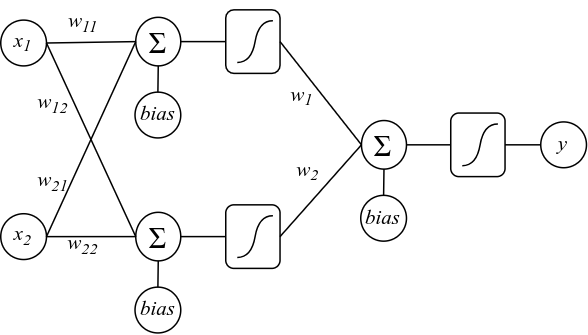

最後の`dense`は中間層がないモデルと同じ

## 学習
入力と出力が変わらない場合、学習方法変わらない

In [4]:
#入力データ
x = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)

# 学習データ
y_true = np.array([
    [0], 
    [1], 
    [1], 
    [0]
], dtype = float)

# コンパイルと学習
model.compile(optimizer="sgd", loss="binary_crossentropy")
model.fit(x, y_true, batch_size=1, epochs=3000)

Epoch 1/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.8333
Epoch 2/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.8295
Epoch 3/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.8259
Epoch 4/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.8223
Epoch 5/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.8188
Epoch 6/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.8155
Epoch 7/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.8122
Epoch 8/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.8090
Epoch 9/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.8059
Epoch 10/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.8029
Epoch 11/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7999
Epoch 12/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7971
Epoch 13/3000
4/4 [==============================

4/4 [==============================] - 0s 1ms/step - loss: 0.7056
Epoch 104/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7054
Epoch 105/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7052
Epoch 106/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7050
Epoch 107/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7048
Epoch 108/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7047
Epoch 109/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7045
Epoch 110/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7043
Epoch 111/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7041
Epoch 112/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7040
Epoch 113/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7038
Epoch 114/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7037
Epoch 115/3000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.6987
Epoch 205/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6987
Epoch 206/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6987
Epoch 207/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6987
Epoch 208/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6987
Epoch 209/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6987
Epoch 210/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6986
Epoch 211/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6986
Epoch 212/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6986
Epoch 213/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6986
Epoch 214/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6986
Epoch 215/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6986
Epoch 216/3000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.6981
Epoch 306/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6981
Epoch 307/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6981
Epoch 308/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6981
Epoch 309/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6981
Epoch 310/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6981
Epoch 311/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6981
Epoch 312/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6981
Epoch 313/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6981
Epoch 314/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6981
Epoch 315/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6981
Epoch 316/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6981
Epoch 317/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.6979
Epoch 407/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6979
Epoch 408/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6979
Epoch 409/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6979
Epoch 410/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6979
Epoch 411/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6979
Epoch 412/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6979
Epoch 413/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6979
Epoch 414/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6979
Epoch 415/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6979
Epoch 416/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6979
Epoch 417/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6979
Epoch 418/3000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.6977
Epoch 508/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.6977
Epoch 509/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6977
Epoch 510/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6977
Epoch 511/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6977
Epoch 512/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.6977
Epoch 513/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6977
Epoch 514/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6977
Epoch 515/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6977
Epoch 516/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6977
Epoch 517/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6977
Epoch 518/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.6977
Epoch 519/3000
4/4 [========================

4/4 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 609/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 610/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 611/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 612/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 613/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 614/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 615/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 616/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 617/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 618/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 619/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 620/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 710/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 711/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 712/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 713/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 714/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 715/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 716/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 717/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 718/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 719/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 720/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 721/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.6972
Epoch 811/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6972
Epoch 812/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6972
Epoch 813/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6972
Epoch 814/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6972
Epoch 815/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6972
Epoch 816/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6972
Epoch 817/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6972
Epoch 818/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6972
Epoch 819/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6972
Epoch 820/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6972
Epoch 821/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6972
Epoch 822/3000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.6971
Epoch 912/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6971
Epoch 913/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6971
Epoch 914/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6971
Epoch 915/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6971
Epoch 916/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6971
Epoch 917/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6971
Epoch 918/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6971
Epoch 919/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6971
Epoch 920/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6971
Epoch 921/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6971
Epoch 922/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6971
Epoch 923/3000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.6970
Epoch 1013/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6970
Epoch 1014/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6970
Epoch 1015/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6970
Epoch 1016/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6970
Epoch 1017/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6970
Epoch 1018/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6970
Epoch 1019/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6970
Epoch 1020/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6970
Epoch 1021/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6970
Epoch 1022/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6970
Epoch 1023/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6970
Epoch 1024/3000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.6969
Epoch 1113/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6969
Epoch 1114/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6969
Epoch 1115/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.6969
Epoch 1116/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6969
Epoch 1117/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6969
Epoch 1118/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6969
Epoch 1119/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6969
Epoch 1120/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6969
Epoch 1121/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6969
Epoch 1122/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6969
Epoch 1123/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6969
Epoch 1124/3000
4/4 [=============

4/4 [==============================] - 0s 249us/step - loss: 0.6968
Epoch 1213/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.6968
Epoch 1214/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6968
Epoch 1215/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6968
Epoch 1216/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6968
Epoch 1217/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6968
Epoch 1218/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6968
Epoch 1219/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6968
Epoch 1220/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6968
Epoch 1221/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6968
Epoch 1222/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6968
Epoch 1223/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6968
Epoch 1224/3000
4/4 [==========

Epoch 1312/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6967
Epoch 1313/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6967
Epoch 1314/3000
4/4 [==============================] - 0s 997us/step - loss: 0.6967
Epoch 1315/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6967
Epoch 1316/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6967
Epoch 1317/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6967
Epoch 1318/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6967
Epoch 1319/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6967
Epoch 1320/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6967
Epoch 1321/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6967
Epoch 1322/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6967
Epoch 1323/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6967
Epoch 1324/300

4/4 [==============================] - 0s 2ms/step - loss: 0.6966
Epoch 1412/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6966
Epoch 1413/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6966
Epoch 1414/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6966
Epoch 1415/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6966
Epoch 1416/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6966
Epoch 1417/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6966
Epoch 1418/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6966
Epoch 1419/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6966
Epoch 1420/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6966
Epoch 1421/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6966
Epoch 1422/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6966
Epoch 1423/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.6965
Epoch 1512/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6965
Epoch 1513/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6965
Epoch 1514/3000
4/4 [==============================] - 0s 728us/step - loss: 0.6965
Epoch 1515/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6965
Epoch 1516/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6965
Epoch 1517/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6965
Epoch 1518/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6965
Epoch 1519/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6965
Epoch 1520/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6965
Epoch 1521/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6965
Epoch 1522/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6965
Epoch 1523/3000
4/4 [=========

4/4 [==============================] - 0s 1ms/step - loss: 0.6964
Epoch 1611/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6964
Epoch 1612/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6964
Epoch 1613/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6964
Epoch 1614/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6964
Epoch 1615/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6964
Epoch 1616/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6964
Epoch 1617/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6964
Epoch 1618/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6964
Epoch 1619/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6964
Epoch 1620/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6964
Epoch 1621/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6964
Epoch 1622/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.6964
Epoch 1711/3000
4/4 [==============================] - 0s 997us/step - loss: 0.6964
Epoch 1712/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6964
Epoch 1713/3000
4/4 [==============================] - 0s 997us/step - loss: 0.6964
Epoch 1714/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6964
Epoch 1715/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6964
Epoch 1716/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6964
Epoch 1717/3000
4/4 [==============================] - 0s 545us/step - loss: 0.6964
Epoch 1718/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6964
Epoch 1719/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6964
Epoch 1720/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6964
Epoch 1721/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.6964
Epoch 1722/3000
4/4 [=====

Epoch 1810/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6963
Epoch 1811/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6963
Epoch 1812/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6963
Epoch 1813/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6963
Epoch 1814/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6963
Epoch 1815/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6963
Epoch 1816/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6963
Epoch 1817/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6963
Epoch 1818/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6963
Epoch 1819/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6963
Epoch 1820/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6963
Epoch 1821/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6963
Epoch 1822/3000


4/4 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 1910/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 1911/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6962
Epoch 1912/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 1913/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 1914/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 1915/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 1916/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6962
Epoch 1917/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 1918/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6962
Epoch 1919/3000
4/4 [==============================] - 0s 71us/step - loss: 0.6962
Epoch 1920/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 1921/3000
4/4 [==========

4/4 [==============================] - 0s 2ms/step - loss: 0.6962
Epoch 2010/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 2011/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6962
Epoch 2012/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 2013/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 2014/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6962
Epoch 2015/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 2016/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6962
Epoch 2017/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6962
Epoch 2018/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6962
Epoch 2019/3000
4/4 [==============================] - 0s 160us/step - loss: 0.6962
Epoch 2020/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6962
Epoch 2021/3000
4/4 [=========

Epoch 2109/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6961
Epoch 2110/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6961
Epoch 2111/3000
4/4 [==============================] - 0s 997us/step - loss: 0.6961
Epoch 2112/3000
4/4 [==============================] - 0s 997us/step - loss: 0.6961
Epoch 2113/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6961
Epoch 2114/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 2115/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6961
Epoch 2116/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 2117/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6961
Epoch 2118/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 2119/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6961
Epoch 2120/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 2121/3

4/4 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 2209/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6961
Epoch 2210/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6961
Epoch 2211/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6961
Epoch 2212/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 2213/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6961
Epoch 2214/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6961
Epoch 2215/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 2216/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 2217/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 2218/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 2219/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 2220/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2309/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2310/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2311/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6960
Epoch 2312/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2313/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6960
Epoch 2314/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2315/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2316/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2317/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2318/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2319/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2320/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2409/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6960
Epoch 2410/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2411/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2412/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2413/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6960
Epoch 2414/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2415/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2416/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2417/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6960
Epoch 2418/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2419/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 2420/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2509/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2510/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2511/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2512/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2513/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2514/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2515/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2516/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2517/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6959
Epoch 2518/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2519/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2520/3000
4/4 [===========

Epoch 2608/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6959
Epoch 2609/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6959
Epoch 2610/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2611/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6959
Epoch 2612/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6959
Epoch 2613/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6959
Epoch 2614/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6959
Epoch 2615/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2616/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2617/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6959
Epoch 2618/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2619/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 2620/3000


4/4 [==============================] - 0s 1ms/step - loss: 0.6958
Epoch 2708/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2709/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6958
Epoch 2710/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2711/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2712/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6958
Epoch 2713/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2714/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2715/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6958
Epoch 2716/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2717/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2718/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6958
Epoch 2719/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.6958
Epoch 2808/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2809/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2810/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2811/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6958
Epoch 2812/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2813/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2814/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2815/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2816/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2817/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2818/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 2819/3000
4/4 [===========

Epoch 2907/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 2908/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6957
Epoch 2909/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6957
Epoch 2910/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 2911/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 2912/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6957
Epoch 2913/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6957
Epoch 2914/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 2915/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6957
Epoch 2916/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6957
Epoch 2917/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 2918/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 2919/3000
4

In [5]:
#結果を確認
y_pred = model.predict(x)
print(y_pred)

[[0.47462213]
 [0.49987733]
 [0.50181496]
 [0.5270624 ]]


## 問題：中間層の活性化
出力数値は「0近い」または「１に近い」数値を望ましいが、中間層の活性化はそうに限らない。

中間層の場合は、0か1ではなく、ある程度に広い範囲を表せる非線形関数は望ましい。
普通に、`relu`という関数をよく使われる。

In [6]:
# 活性化関数
from keras.activations import tanh

# モデル作成
def create_model():
    
    # 入力レイヤ
    x = Input(shape=(2), dtype=float)
    
    # 全結合中間層は出力が2つ
    w = Dense(units=2)(x)
    
    # 活性化関数
    h = Activation(tanh)(w)
        
    # 全結合で、中間層と出力を繋げる
    w = Dense(units=1)(h)

    # 出力の活性化
    y = Activation(sigmoid)(w)
    
    # モデル
    model = Model(inputs=x, outputs=y)
    
    return model

In [7]:
# モデル作成＆コンパイル
model = create_model()
model.compile(optimizer="sgd", loss="binary_crossentropy")

In [8]:
model.fit(x, y_true, batch_size=1, epochs=3000)

Epoch 1/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7896
Epoch 2/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7867
Epoch 3/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7840
Epoch 4/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7813
Epoch 5/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7787
Epoch 6/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7762
Epoch 7/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7737
Epoch 8/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7713
Epoch 9/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7690
Epoch 10/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7668
Epoch 11/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7646
Epoch 12/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7624
Epoch 13/3000
4/4 [==============================

4/4 [==============================] - 0s 2ms/step - loss: 0.6854
Epoch 104/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6850
Epoch 105/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6846
Epoch 106/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6842
Epoch 107/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6838
Epoch 108/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6835
Epoch 109/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6831
Epoch 110/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6827
Epoch 111/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6824
Epoch 112/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6820
Epoch 113/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6816
Epoch 114/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6813
Epoch 115/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.6571
Epoch 205/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6569
Epoch 206/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6567
Epoch 207/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6564
Epoch 208/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6562
Epoch 209/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6560
Epoch 210/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6558
Epoch 211/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6555
Epoch 212/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6553
Epoch 213/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6551
Epoch 214/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6549
Epoch 215/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6546
Epoch 216/3000
4/4 [========================

4/4 [==============================] - 0s 2ms/step - loss: 0.6327
Epoch 306/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6324
Epoch 307/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6321
Epoch 308/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6318
Epoch 309/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6315
Epoch 310/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6312
Epoch 311/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6309
Epoch 312/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6307
Epoch 313/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6304
Epoch 314/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6301
Epoch 315/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6298
Epoch 316/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6295
Epoch 317/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.5957
Epoch 407/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.5952
Epoch 408/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5948
Epoch 409/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5943
Epoch 410/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5938
Epoch 411/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5934
Epoch 412/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5929
Epoch 413/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5924
Epoch 414/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5919
Epoch 415/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5915
Epoch 416/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5910
Epoch 417/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5905
Epoch 418/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.5415
Epoch 508/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5409
Epoch 509/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5403
Epoch 510/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5397
Epoch 511/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5391
Epoch 512/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5385
Epoch 513/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5379
Epoch 514/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5373
Epoch 515/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5367
Epoch 516/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5361
Epoch 517/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5355
Epoch 518/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5349
Epoch 519/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.4779
Epoch 609/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4772
Epoch 610/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4766
Epoch 611/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4759
Epoch 612/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4752
Epoch 613/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4746
Epoch 614/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4739
Epoch 615/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4733
Epoch 616/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4726
Epoch 617/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4719
Epoch 618/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4713
Epoch 619/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4706
Epoch 620/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.4096
Epoch 710/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4089
Epoch 711/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4083
Epoch 712/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.4076
Epoch 713/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4069
Epoch 714/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4062
Epoch 715/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4056
Epoch 716/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4049
Epoch 717/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.4042
Epoch 718/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4035
Epoch 719/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4029
Epoch 720/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4022
Epoch 721/3000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.3436
Epoch 811/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3430
Epoch 812/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3423
Epoch 813/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3417
Epoch 814/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3411
Epoch 815/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3405
Epoch 816/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3399
Epoch 817/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3393
Epoch 818/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3386
Epoch 819/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3380
Epoch 820/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3374
Epoch 821/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3368
Epoch 822/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.2860
Epoch 912/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2855
Epoch 913/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2849
Epoch 914/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2844
Epoch 915/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2839
Epoch 916/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2834
Epoch 917/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2829
Epoch 918/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2824
Epoch 919/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2819
Epoch 920/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2814
Epoch 921/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2808
Epoch 922/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2803
Epoch 923/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.2390
Epoch 1013/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2386
Epoch 1014/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2381
Epoch 1015/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2377
Epoch 1016/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2373
Epoch 1017/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2369
Epoch 1018/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2365
Epoch 1019/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2361
Epoch 1020/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2357
Epoch 1021/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2353
Epoch 1022/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2349
Epoch 1023/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2345
Epoch 1024/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.2021
Epoch 1113/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2018
Epoch 1114/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2014
Epoch 1115/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2011
Epoch 1116/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2008
Epoch 1117/3000
4/4 [==============================] - 0s 699us/step - loss: 0.2005
Epoch 1118/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2001
Epoch 1119/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1998
Epoch 1120/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1995
Epoch 1121/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1992
Epoch 1122/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1989
Epoch 1123/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1985
Epoch 1124/3000
4/4 [=========

4/4 [==============================] - 0s 2ms/step - loss: 0.1730
Epoch 1213/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1728
Epoch 1214/3000
4/4 [==============================] - 0s 996us/step - loss: 0.1725
Epoch 1215/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1723
Epoch 1216/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1720
Epoch 1217/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1718
Epoch 1218/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1715
Epoch 1219/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1713
Epoch 1220/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1710
Epoch 1221/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1708
Epoch 1222/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1705
Epoch 1223/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1703
Epoch 1224/3000
4/4 [=========

4/4 [==============================] - 0s 824us/step - loss: 0.1501
Epoch 1313/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1499
Epoch 1314/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1497
Epoch 1315/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1495
Epoch 1316/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1492
Epoch 1317/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1490
Epoch 1318/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1488
Epoch 1319/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1486
Epoch 1320/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1484
Epoch 1321/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1482
Epoch 1322/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1480
Epoch 1323/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1478
Epoch 1324/3000
4/4 [=========

4/4 [==============================] - 0s 3ms/step - loss: 0.1319
Epoch 1412/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1317
Epoch 1413/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1315
Epoch 1414/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1314
Epoch 1415/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1312
Epoch 1416/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1310
Epoch 1417/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1309
Epoch 1418/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1307
Epoch 1419/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1305
Epoch 1420/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1304
Epoch 1421/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1302
Epoch 1422/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1301
Epoch 1423/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.1171
Epoch 1511/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1170
Epoch 1512/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1168
Epoch 1513/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1167
Epoch 1514/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1165
Epoch 1515/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1164
Epoch 1516/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1163
Epoch 1517/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1161
Epoch 1518/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1160
Epoch 1519/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1159
Epoch 1520/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1158
Epoch 1521/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1156
Epoch 1522/3000
4/4 [===========

4/4 [==============================] - 0s 810us/step - loss: 0.1050
Epoch 1610/3000
4/4 [==============================] - 0s 996us/step - loss: 0.1048
Epoch 1611/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1047
Epoch 1612/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1046
Epoch 1613/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1045
Epoch 1614/3000
4/4 [==============================] - 0s 997us/step - loss: 0.1044
Epoch 1615/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1043
Epoch 1616/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1042
Epoch 1617/3000
4/4 [==============================] - 0s 801us/step - loss: 0.1041
Epoch 1618/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1040
Epoch 1619/3000
4/4 [==============================] - 0s 943us/step - loss: 0.1039
Epoch 1620/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1037
Epoch 1621/3000
4/4 [=

4/4 [==============================] - 0s 1ms/step - loss: 0.0949
Epoch 1709/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0948
Epoch 1710/3000
4/4 [==============================] - 0s 880us/step - loss: 0.0947
Epoch 1711/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0946
Epoch 1712/3000
4/4 [==============================] - 0s 903us/step - loss: 0.0945
Epoch 1713/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0944
Epoch 1714/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0943
Epoch 1715/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0942
Epoch 1716/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0941
Epoch 1717/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0940
Epoch 1718/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0940
Epoch 1719/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0939
Epoch 1720/3000
4/4 [=======

4/4 [==============================] - 0s 905us/step - loss: 0.0864
Epoch 1808/3000
4/4 [==============================] - 0s 970us/step - loss: 0.0863
Epoch 1809/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0862
Epoch 1810/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0862
Epoch 1811/3000
4/4 [==============================] - 0s 692us/step - loss: 0.0861
Epoch 1812/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0860
Epoch 1813/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0859
Epoch 1814/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0858
Epoch 1815/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0858
Epoch 1816/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0857
Epoch 1817/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0856
Epoch 1818/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0855
Epoch 1819/3000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.0792
Epoch 1907/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0791
Epoch 1908/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0791
Epoch 1909/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0790
Epoch 1910/3000
4/4 [==============================] - 0s 954us/step - loss: 0.0789
Epoch 1911/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0789
Epoch 1912/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0788
Epoch 1913/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0787
Epoch 1914/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0787
Epoch 1915/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0786
Epoch 1916/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0785
Epoch 1917/3000
4/4 [==============================] - 0s 740us/step - loss: 0.0785
Epoch 1918/3000
4/4 [=======

4/4 [==============================] - 0s 1ms/step - loss: 0.0730
Epoch 2006/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0729
Epoch 2007/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0729
Epoch 2008/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0728
Epoch 2009/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0728
Epoch 2010/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0727
Epoch 2011/3000
4/4 [==============================] - 0s 949us/step - loss: 0.0727
Epoch 2012/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0726
Epoch 2013/3000
4/4 [==============================] - 0s 827us/step - loss: 0.0725
Epoch 2014/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0725
Epoch 2015/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0724
Epoch 2016/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 2017/3000
4/4 [=======

Epoch 2105/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0676
Epoch 2106/3000
4/4 [==============================] - 0s 748us/step - loss: 0.0675
Epoch 2107/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 2108/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0674
Epoch 2109/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 2110/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0673
Epoch 2111/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 2112/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0672
Epoch 2113/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0672
Epoch 2114/3000
4/4 [==============================] - 0s 934us/step - loss: 0.0671
Epoch 2115/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0671
Epoch 2116/3000
4/4 [==============================] - 0s 972us/step - loss: 0.0670
Epoch 2117

4/4 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 2205/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 2206/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0628
Epoch 2207/3000
4/4 [==============================] - 0s 432us/step - loss: 0.0628
Epoch 2208/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0628
Epoch 2209/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0627
Epoch 2210/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0627
Epoch 2211/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0626
Epoch 2212/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0626
Epoch 2213/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0625
Epoch 2214/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 2215/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0624
Epoch 2216/3000
4/4 [============

4/4 [==============================] - 0s 568us/step - loss: 0.0588
Epoch 2305/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0587
Epoch 2306/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0587
Epoch 2307/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0587
Epoch 2308/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 2309/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 2310/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0586
Epoch 2311/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 2312/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0585
Epoch 2313/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0584
Epoch 2314/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0584
Epoch 2315/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0584
Epoch 2316/3000
4/4 [=============

4/4 [==============================] - 0s 1ms/step - loss: 0.0551
Epoch 2405/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0551
Epoch 2406/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0551
Epoch 2407/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 2408/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 2409/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 2410/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 2411/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0549
Epoch 2412/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 2413/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0548
Epoch 2414/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 2415/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0547
Epoch 2416/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0519
Epoch 2505/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0518
Epoch 2506/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0518
Epoch 2507/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0518
Epoch 2508/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0517
Epoch 2509/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0517
Epoch 2510/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0517
Epoch 2511/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0517
Epoch 2512/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0516
Epoch 2513/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0516
Epoch 2514/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0516
Epoch 2515/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 2516/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0490
Epoch 2605/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0489
Epoch 2606/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0489
Epoch 2607/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0489
Epoch 2608/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0488
Epoch 2609/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 2610/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 2611/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0488
Epoch 2612/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0487
Epoch 2613/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0487
Epoch 2614/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0487
Epoch 2615/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0486
Epoch 2616/3000
4/4 [===========

4/4 [==============================] - 0s 996us/step - loss: 0.0463
Epoch 2705/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0463
Epoch 2706/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0463
Epoch 2707/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0463
Epoch 2708/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0462
Epoch 2709/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0462
Epoch 2710/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0462
Epoch 2711/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0462
Epoch 2712/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 2713/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 2714/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 2715/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0461
Epoch 2716/3000
4/4 [=========

4/4 [==============================] - 0s 4ms/step - loss: 0.0440
Epoch 2805/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0439
Epoch 2806/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0439
Epoch 2807/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0439
Epoch 2808/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0439
Epoch 2809/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0439
Epoch 2810/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 2811/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0438
Epoch 2812/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 2813/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0438
Epoch 2814/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0437
Epoch 2815/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0437
Epoch 2816/3000
4/4 [============

4/4 [==============================] - 0s 423us/step - loss: 0.0418
Epoch 2904/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0418
Epoch 2905/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0418
Epoch 2906/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0418
Epoch 2907/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0418
Epoch 2908/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0417
Epoch 2909/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 2910/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 2911/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 2912/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 2913/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0416
Epoch 2914/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0416
Epoch 2915/3000
4/4 [===========

In [9]:
#結果を確認
y_pred = model.predict(x)
print(y_pred)

[[0.03039739]
 [0.95025325]
 [0.94937015]
 [0.02537829]]


## 正しくに学習しない場合
モデルの荷重はランダムの荷重で始まるので、初期化の状況により、なかなか荷重を最適化できない場合もある。

中間層のunitsを増やすことで、最適化できる範囲が広がり、解決を見つけることが楽になる（もちろん、その分の計算量が増え、重くなる）

units=8までを増やし、直るかどうかを確認：

In [10]:
# 活性化関数
from keras.activations import tanh

# モデル作成
def create_model():
    
    # 入力レイヤ
    x = Input(shape=(2), dtype=float)
    
    # 全結合中間層は出力が8つ
    w = Dense(units=8)(x)
    
    # 活性化関数
    h = Activation(tanh)(w)
        
    # 全結合で、中間層と出力を繋げる
    w = Dense(units=1)(h)

    # 出力の活性化
    y = Activation(sigmoid)(w)
    
    # モデル
    model = Model(inputs=x, outputs=y)
    
    return model

In [11]:
# モデル作成＆コンパイル
model = create_model()
model.compile(optimizer="sgd", loss="binary_crossentropy")

In [12]:
model.fit(x, y_true, batch_size=1, epochs=3000)

Epoch 1/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.8070
Epoch 2/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.8012
Epoch 3/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7959
Epoch 4/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7909
Epoch 5/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7862
Epoch 6/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7818
Epoch 7/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7777
Epoch 8/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7739
Epoch 9/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7704
Epoch 10/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7669
Epoch 11/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7637
Epoch 12/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7607
Epoch 13/3000
4/4 [==============================

4/4 [==============================] - 0s 2ms/step - loss: 0.7087
Epoch 104/3000
4/4 [==============================] - 0s 995us/step - loss: 0.7085
Epoch 105/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7084
Epoch 106/3000
4/4 [==============================] - 0s 999us/step - loss: 0.7083
Epoch 107/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7082
Epoch 108/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7081
Epoch 109/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.7080
Epoch 110/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7079
Epoch 111/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7078
Epoch 112/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7076
Epoch 113/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7075
Epoch 114/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.7074
Epoch 115/3000
4/4 [===================

4/4 [==============================] - 0s 789us/step - loss: 0.7000
Epoch 205/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6999
Epoch 206/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6998
Epoch 207/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6998
Epoch 208/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6997
Epoch 209/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6997
Epoch 210/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6996
Epoch 211/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6995
Epoch 212/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6994
Epoch 213/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6994
Epoch 214/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6993
Epoch 215/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6993
Epoch 216/3000
4/4 [=====================

4/4 [==============================] - 0s 1ms/step - loss: 0.6944
Epoch 306/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6944
Epoch 307/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6943
Epoch 308/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 309/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6942
Epoch 310/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6942
Epoch 311/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6941
Epoch 312/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6941
Epoch 313/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6940
Epoch 314/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6940
Epoch 315/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6939
Epoch 316/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6939
Epoch 317/3000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.6892
Epoch 407/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6891
Epoch 408/3000
4/4 [==============================] - 0s 997us/step - loss: 0.6890
Epoch 409/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6890
Epoch 410/3000
4/4 [==============================] - 0s 927us/step - loss: 0.6889
Epoch 411/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 412/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 413/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 414/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6887
Epoch 415/3000
4/4 [==============================] - 0s 981us/step - loss: 0.6886
Epoch 416/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6886
Epoch 417/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6885
Epoch 418/3000
4/4 [=================

4/4 [==============================] - 0s 553us/step - loss: 0.6823
Epoch 508/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6822
Epoch 509/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6822
Epoch 510/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6821
Epoch 511/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6820
Epoch 512/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6819
Epoch 513/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6819
Epoch 514/3000
4/4 [==============================] - 0s 879us/step - loss: 0.6818
Epoch 515/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6817
Epoch 516/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6816
Epoch 517/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6815
Epoch 518/3000
4/4 [==============================] - 0s 994us/step - loss: 0.6814
Epoch 519/3000
4/4 [=================

4/4 [==============================] - 0s 1ms/step - loss: 0.6724
Epoch 609/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6723
Epoch 610/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6722
Epoch 611/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6721
Epoch 612/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6719
Epoch 613/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6718
Epoch 614/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6717
Epoch 615/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6716
Epoch 616/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6715
Epoch 617/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6713
Epoch 618/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6712
Epoch 619/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6711
Epoch 620/3000
4/4 [=======================

4/4 [==============================] - 0s 0s/step - loss: 0.6578
Epoch 710/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.6576
Epoch 711/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6575
Epoch 712/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6573
Epoch 713/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6571
Epoch 714/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6569
Epoch 715/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6568
Epoch 716/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6566
Epoch 717/3000
4/4 [==============================] - 0s 857us/step - loss: 0.6564
Epoch 718/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6562
Epoch 719/3000
4/4 [==============================] - 0s 143us/step - loss: 0.6560
Epoch 720/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6559
Epoch 721/3000
4/4 [=====================

4/4 [==============================] - 0s 0s/step - loss: 0.6369
Epoch 811/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6366
Epoch 812/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6363
Epoch 813/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6361
Epoch 814/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6359
Epoch 815/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6356
Epoch 816/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6354
Epoch 817/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6351
Epoch 818/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6349
Epoch 819/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6346
Epoch 820/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6344
Epoch 821/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6341
Epoch 822/3000
4/4 [===========================

4/4 [==============================] - 0s 1ms/step - loss: 0.6084
Epoch 912/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6081
Epoch 913/3000
4/4 [==============================] - 0s 994us/step - loss: 0.6078
Epoch 914/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6075
Epoch 915/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6071
Epoch 916/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6068
Epoch 917/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6065
Epoch 918/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.6062
Epoch 919/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6058
Epoch 920/3000
4/4 [==============================] - 0s 619us/step - loss: 0.6055
Epoch 921/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6052
Epoch 922/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.6048
Epoch 923/3000
4/4 [===================

4/4 [==============================] - 0s 2ms/step - loss: 0.5730
Epoch 1013/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5726
Epoch 1014/3000
4/4 [==============================] - 0s 997us/step - loss: 0.5722
Epoch 1015/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5718
Epoch 1016/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.5715
Epoch 1017/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5711
Epoch 1018/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.5707
Epoch 1019/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5703
Epoch 1020/3000
4/4 [==============================] - 0s 981us/step - loss: 0.5699
Epoch 1021/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.5695
Epoch 1022/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5692
Epoch 1023/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.5688
Epoch 1024/3000
4/4 [=======

Epoch 1112/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.5332
Epoch 1113/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.5328
Epoch 1114/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5324
Epoch 1115/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.5320
Epoch 1116/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.5316
Epoch 1117/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5312
Epoch 1118/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5308
Epoch 1119/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.5303
Epoch 1120/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 1121/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 1122/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.5291
Epoch 1123/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.5287
Epoch 1124/3000


4/4 [==============================] - 0s 2ms/step - loss: 0.4919
Epoch 1212/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.4915
Epoch 1213/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.4911
Epoch 1214/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.4906
Epoch 1215/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.4902
Epoch 1216/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.4898
Epoch 1217/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.4894
Epoch 1218/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4889
Epoch 1219/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.4885
Epoch 1220/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4881
Epoch 1221/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.4877
Epoch 1222/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4873
Epoch 1223/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.4497
Epoch 1312/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4493
Epoch 1313/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4489
Epoch 1314/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4485
Epoch 1315/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4481
Epoch 1316/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4477
Epoch 1317/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4472
Epoch 1318/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4468
Epoch 1319/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4464
Epoch 1320/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.4460
Epoch 1321/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4456
Epoch 1322/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4451
Epoch 1323/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.4084
Epoch 1411/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4079
Epoch 1412/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4075
Epoch 1413/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4071
Epoch 1414/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4067
Epoch 1415/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4063
Epoch 1416/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.4059
Epoch 1417/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4055
Epoch 1418/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4051
Epoch 1419/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4046
Epoch 1420/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4042
Epoch 1421/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.4038
Epoch 1422/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3677
Epoch 1510/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3673
Epoch 1511/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3669
Epoch 1512/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3665
Epoch 1513/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3661
Epoch 1514/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3657
Epoch 1515/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3653
Epoch 1516/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3649
Epoch 1517/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3645
Epoch 1518/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3640
Epoch 1519/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3637
Epoch 1520/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3632
Epoch 1521/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3279
Epoch 1610/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3275
Epoch 1611/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3271
Epoch 1612/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3267
Epoch 1613/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3263
Epoch 1614/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3259
Epoch 1615/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3255
Epoch 1616/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3251
Epoch 1617/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.3247
Epoch 1618/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3244
Epoch 1619/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3240
Epoch 1620/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3236
Epoch 1621/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.2899
Epoch 1710/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2895
Epoch 1711/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2892
Epoch 1712/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2888
Epoch 1713/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2884
Epoch 1714/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2881
Epoch 1715/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2877
Epoch 1716/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2873
Epoch 1717/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2870
Epoch 1718/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2866
Epoch 1719/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2862
Epoch 1720/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2859
Epoch 1721/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.2545
Epoch 1810/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2542
Epoch 1811/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2539
Epoch 1812/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2535
Epoch 1813/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2532
Epoch 1814/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2529
Epoch 1815/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2525
Epoch 1816/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2522
Epoch 1817/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2518
Epoch 1818/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2515
Epoch 1819/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2512
Epoch 1820/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 1821/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.2223
Epoch 1910/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2220
Epoch 1911/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2217
Epoch 1912/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2214
Epoch 1913/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2211
Epoch 1914/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2208
Epoch 1915/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2205
Epoch 1916/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2202
Epoch 1917/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2199
Epoch 1918/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2196
Epoch 1919/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2193
Epoch 1920/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2190
Epoch 1921/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.1938
Epoch 2009/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1936
Epoch 2010/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1933
Epoch 2011/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1930
Epoch 2012/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1928
Epoch 2013/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1925
Epoch 2014/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1922
Epoch 2015/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1920
Epoch 2016/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1917
Epoch 2017/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1914
Epoch 2018/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1912
Epoch 2019/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1909
Epoch 2020/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.1686
Epoch 2109/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1684
Epoch 2110/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1682
Epoch 2111/3000
4/4 [==============================] - 0s 0s/step - loss: 0.1679
Epoch 2112/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1677
Epoch 2113/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1675
Epoch 2114/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1672
Epoch 2115/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1670
Epoch 2116/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1668
Epoch 2117/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1665
Epoch 2118/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1663
Epoch 2119/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1661
Epoch 2120/3000
4/4 [============

4/4 [==============================] - 0s 884us/step - loss: 0.1469
Epoch 2209/3000
4/4 [==============================] - 0s 0s/step - loss: 0.1467
Epoch 2210/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1465
Epoch 2211/3000
4/4 [==============================] - 0s 0s/step - loss: 0.1463
Epoch 2212/3000
4/4 [==============================] - 0s 429us/step - loss: 0.1461
Epoch 2213/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1459
Epoch 2214/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1457
Epoch 2215/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1455
Epoch 2216/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1453
Epoch 2217/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1451
Epoch 2218/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1449
Epoch 2219/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1447
Epoch 2220/3000
4/4 [=========

4/4 [==============================] - 0s 1ms/step - loss: 0.1282
Epoch 2309/3000
4/4 [==============================] - 0s 758us/step - loss: 0.1281
Epoch 2310/3000
4/4 [==============================] - 0s 0s/step - loss: 0.1279
Epoch 2311/3000
4/4 [==============================] - 0s 0s/step - loss: 0.1277
Epoch 2312/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1276
Epoch 2313/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1274
Epoch 2314/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1272
Epoch 2315/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1270
Epoch 2316/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1269
Epoch 2317/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1267
Epoch 2318/3000
4/4 [==============================] - 0s 294us/step - loss: 0.1265
Epoch 2319/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1264
Epoch 2320/3000
4/4 [=========

4/4 [==============================] - 0s 1ms/step - loss: 0.1124
Epoch 2409/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1123
Epoch 2410/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1122
Epoch 2411/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1120
Epoch 2412/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1119
Epoch 2413/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1117
Epoch 2414/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1116
Epoch 2415/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1114
Epoch 2416/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1113
Epoch 2417/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1111
Epoch 2418/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1110
Epoch 2419/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1109
Epoch 2420/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0991
Epoch 2509/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0990
Epoch 2510/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0988
Epoch 2511/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0987
Epoch 2512/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0986
Epoch 2513/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0985
Epoch 2514/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0983
Epoch 2515/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0982
Epoch 2516/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0981
Epoch 2517/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0980
Epoch 2518/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0979
Epoch 2519/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0977
Epoch 2520/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0879
Epoch 2608/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0878
Epoch 2609/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0877
Epoch 2610/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0876
Epoch 2611/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0875
Epoch 2612/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0874
Epoch 2613/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0873
Epoch 2614/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0872
Epoch 2615/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0871
Epoch 2616/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0870
Epoch 2617/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0868
Epoch 2618/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0867
Epoch 2619/3000
4/4 [===========

Epoch 2707/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0783
Epoch 2708/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0782
Epoch 2709/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0781
Epoch 2710/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0780
Epoch 2711/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0779
Epoch 2712/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0779
Epoch 2713/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0778
Epoch 2714/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0777
Epoch 2715/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0776
Epoch 2716/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0775
Epoch 2717/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0774
Epoch 2718/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0773
Epoch 2719/3000


4/4 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 2807/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 2808/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0701
Epoch 2809/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0700
Epoch 2810/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0699
Epoch 2811/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0698
Epoch 2812/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0698
Epoch 2813/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0697
Epoch 2814/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0696
Epoch 2815/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0696
Epoch 2816/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0695
Epoch 2817/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0694
Epoch 2818/3000
4/4 [============

4/4 [==============================] - 0s 1ms/step - loss: 0.0633
Epoch 2906/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0633
Epoch 2907/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0632
Epoch 2908/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0631
Epoch 2909/3000
4/4 [==============================] - 0s 798us/step - loss: 0.0631
Epoch 2910/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0630
Epoch 2911/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 2912/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0629
Epoch 2913/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0628
Epoch 2914/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0628
Epoch 2915/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0627
Epoch 2916/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 2917/3000
4/4 [==========

In [13]:
y_pred = model.predict(x)
print(y_pred)

[[0.03797939]
 [0.94316757]
 [0.94835865]
 [0.07594568]]
